In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
files_to_ignore = ['.DS_Store', 'final_merged_results']
script_1_path = '../../model_results/bilstm_results/script_2/'
script_1_folders = os.listdir(script_1_path)
script_1_folders = [folder for folder in script_1_folders if folder not in files_to_ignore]
script_1_folders

['BiLSTM_2023-09-12_13-23-29',
 'BiLSTM_2023-09-06_18-14-29',
 'BiLSTM_2023-09-10_14-23-18',
 'BiLSTM_2023-09-14_15-38-12']

In [7]:
results_path = f'{script_1_path}final_merged_results/'
df = pd.read_csv(f'{results_path}results_BiLSTM_script_2_gridSearch_results.csv')
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              1             0                0    128           0.0   
1              0             1                5     32           0.0   
2              0             2                5     32           0.0   
3              0             3                5     32           0.0   
4              0             4                5     32           0.0   
...          ...           ...              ...    ...           ...   
3452           0          3452                5    128           0.6   
3453           0          3453                5    128           0.6   
3454           0          3454                5    128           0.6   
3455           0          3455                5    128           0.6   
3456           0          3456                5    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                    NaN                       NaN       NaN           0   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         250   
...                  ...                       ...       ...         ...   
3452             softmax                     hinge      Adam         500   
3453             softmax                     hinge      Adam        1000   
3454             softmax                     hinge      Adam        1000   
3455             softmax                     hinge      Adam        1000   
3456             softmax                     hinge      Adam        1000   

      batch_size  ...  test_accuracy             precision_values  \
0              0  ...         0.0000                           {}   
1            512  ...         0.3958   {0: 0.62, 1: 0.3, 2: 0.17}   
2           1024  ...         0.4181   {0: 0.6, 1: 0.31, 2: 0.17}   
3           2048  ...         0.4501   {0: 0.6, 1: 0.31, 2: 0.22}   
4           4096  ...         0.4640  {0: 0.59, 1: 0.31, 2: 0.26}   
...          ...  ...            ...                          ...   
3452        4096  ...         0.3445  {0: 0.59, 1: 0.28, 2: 0.16}   
3453         512  ...         0.3719  {0: 0.59, 1: 0.28, 2: 0.16}   
3454        1024  ...         0.3479   {0: 0.6, 1: 0.29, 2: 0.13}   
3455        2048  ...         0.3579  {0: 0.61, 1: 0.28, 2: 0.16}   
3456        4096  ...         0.3386   {0: 0.6, 1: 0.28, 2: 0.17}   

                    recall_values                    f1_scores  \
0                              {}                           {}   
1     {0: 0.37, 1: 0.63, 2: 0.11}   {0: 0.46, 1: 0.4, 2: 0.13}   
2     {0: 0.42, 1: 0.62, 2: 0.07}    {0: 0.5, 1: 0.41, 2: 0.1}   
3     {0: 0.51, 1: 0.56, 2: 0.05}   {0: 0.55, 1: 0.4, 2: 0.08}   
4     {0: 0.57, 1: 0.48, 2: 0.05}  {0: 0.58, 1: 0.38, 2: 0.09}   
...                           ...                          ...   
3452    {0: 0.3, 1: 0.53, 2: 0.2}   {0: 0.4, 1: 0.36, 2: 0.18}   
3453  {0: 0.34, 1: 0.61, 2: 0.09}  {0: 0.43, 1: 0.39, 2: 0.12}   
3454  {0: 0.32, 1: 0.51, 2: 0.18}  {0: 0.42, 1: 0.37, 2: 0.15}   
3455  {0: 0.32, 1: 0.53, 2: 0.19}  {0: 0.42, 1: 0.37, 2: 0.17}   
3456  {0: 0.28, 1: 0.55, 2: 0.21}  {0: 0.38, 1: 0.37, 2: 0.19}   

                                         macro_averages  \
0                                                    {}   
1     {'precision': 0.36, 'recall': 0.37, 'f1_score'...   
2     {'precision': 0.36, 'recall': 0.37, 'f1_score'...   
3     {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
4     {'precision': 0.39, 'recall': 0.37, 'f1_score'...   
...                                                 ...   
3452  {'precision': 0.34, 'recall': 0.34, 'f1_score'...   
3453  {'precision': 0.34, 'recall': 0.35, 'f1_score'...   
3454  {'precision': 0.34, 'recall': 0.34, 'f1_score'...   
3455  {'precisio

In [8]:
df.dtypes

script_num                 int64
search_count               int64
sequence_length            int64
units                      int64
dropout_rate             float64
activation_function       object
loss_function             object
optimizer                 object
num_epochs                 int64
batch_size                 int64
seed_value                 int64
training_loss            float64
training_accuracy        float64
validation_loss          float64
validation_accuracy      float64
test_loss                float64
test_accuracy            float64
precision_values          object
recall_values             object
f1_scores                 object
macro_averages            object
weighted_averages         object
model_parameters          object
model_keys                object
classification_report     object
confusion_matrix          object
dtype: object

In [9]:
## Filter rows to get rid of certain parameter combinations
rows_to_remove = []

for indx, row in df.iterrows():
    if (row['activation_function'] == 'relu' and row['loss_function'] == 'categorical_crossentropy') or \
       (row['activation_function'] == 'relu' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'categorical_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'tanh' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam'):
        rows_to_remove.append(indx)

df.drop(rows_to_remove, inplace=True) 
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              1             0                0    128           0.0   
1              0             1                5     32           0.0   
2              0             2                5     32           0.0   
3              0             3                5     32           0.0   
4              0             4                5     32           0.0   
...          ...           ...              ...    ...           ...   
3440           0          3440                5    128           0.6   
3441           0          3441                5    128           0.6   
3442           0          3442                5    128           0.6   
3443           0          3443                5    128           0.6   
3444           0          3444                5    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                    NaN                       NaN       NaN           0   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         250   
...                  ...                       ...       ...         ...   
3440             softmax                     hinge       SGD         500   
3441             softmax                     hinge       SGD        1000   
3442             softmax                     hinge       SGD        1000   
3443             softmax                     hinge       SGD        1000   
3444             softmax                     hinge       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
0              0  ...         0.0000                           {}   
1            512  ...         0.3958   {0: 0.62, 1: 0.3, 2: 0.17}   
2           1024  ...         0.4181   {0: 0.6, 1: 0.31, 2: 0.17}   
3           2048  ...         0.4501   {0: 0.6, 1: 0.31, 2: 0.22}   
4           4096  ...         0.4640  {0: 0.59, 1: 0.31, 2: 0.26}   
...          ...  ...            ...                          ...   
3440        4096  ...         0.4402   {0: 0.58, 1: 0.28, 2: 0.5}   
3441         512  ...         0.4395   {0: 0.6, 1: 0.31, 2: 0.21}   
3442        1024  ...         0.4522   {0: 0.6, 1: 0.31, 2: 0.16}   
3443        2048  ...         0.4559  {0: 0.59, 1: 0.29, 2: 0.62}   
3444        4096  ...         0.4460  {0: 0.58, 1: 0.28, 2: 0.67}   

                    recall_values                    f1_scores  \
0                              {}                           {}   
1     {0: 0.37, 1: 0.63, 2: 0.11}   {0: 0.46, 1: 0.4, 2: 0.13}   
2     {0: 0.42, 1: 0.62, 2: 0.07}    {0: 0.5, 1: 0.41, 2: 0.1}   
3     {0: 0.51, 1: 0.56, 2: 0.05}   {0: 0.55, 1: 0.4, 2: 0.08}   
4     {0: 0.57, 1: 0.48, 2: 0.05}  {0: 0.58, 1: 0.38, 2: 0.09}   
...                           ...                          ...   
3440    {0: 0.54, 1: 0.5, 2: 0.0}   {0: 0.56, 1: 0.36, 2: 0.0}   
3441   {0: 0.48, 1: 0.6, 2: 0.02}  {0: 0.53, 1: 0.41, 2: 0.04}   
3442  {0: 0.52, 1: 0.58, 2: 0.01}   {0: 0.56, 1: 0.4, 2: 0.02}   
3443    {0: 0.56, 1: 0.5, 2: 0.0}  {0: 0.58, 1: 0.37, 2: 0.01}   
3444   {0: 0.55, 1: 0.49, 2: 0.0}   {0: 0.57, 1: 0.36, 2: 0.0}   

                                         macro_averages  \
0                                                    {}   
1     {'precision': 0.36, 'recall': 0.37, 'f1_score'...   
2     {'precision': 0.36, 'recall': 0.37, 'f1_score'...   
3     {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
4     {'precision': 0.39, 'recall': 0.37, 'f1_score'...   
...                                                 ...   
3440  {'precision': 0.45, 'recall': 0.35, 'f1_score'...   
3441  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
3442  {'precision': 0.36, 'recall': 0.37, 'f1_score'...   
3443  {'precisio

In [10]:
top_n_model_test_accuracies = df['test_accuracy'].nlargest(100)
top_n_model_test_accuracy_indexes = top_n_model_test_accuracies.index

In [11]:
top_n_model_test_accuracy_indexes

Index([ 675,  682, 1829, 1035, 2692, 1590, 1313, 2118, 1043, 1250, 1875, 3317,
       3321, 2481,  751, 3269, 2171, 2984, 3323, 3315, 3026, 3319,  972,  969,
       1595,  968, 1542, 1039, 2461, 2454,  964, 2690, 1254, 3324,  729,  731,
       2181,  437,  443,   97, 2769, 3036, 1252, 1546, 1040,  385, 2742,  987,
        722, 3322,  747,  992, 2458,  676,  102,  725, 1617,  680, 2406, 2401,
        681, 3345,  965,  990, 3275,  995, 2161,  985, 1044,  991,  986, 2169,
       2450,  988, 1257,  961,  996, 2741, 2120,  172, 1545, 1030, 2172, 2987,
       2470,  699,  704, 2123, 2695,  745,  730,  155, 1253,  700, 1890,  461,
        392,  707,  697,  702],
      dtype='int64')

In [12]:
top_n_models = df.loc[top_n_model_test_accuracy_indexes]
print(type(top_n_models))
top_n_models

<class 'pandas.core.frame.DataFrame'>


script_num  search_count  sequence_length  units  dropout_rate  \
675            0           675                5     32           0.4   
682            0           682                5     32           0.4   
1829           0          1829                5     64           0.4   
1035           0          1035                5     32           0.6   
2692           0          2692                5    128           0.2   
...          ...           ...              ...    ...           ...   
461            0           461                5     32           0.2   
392            0           392                5     32           0.2   
707            0           707                5     32           0.4   
697            0           697                5     32           0.4   
702            0           702                5     32           0.4   

     activation_function        loss_function optimizer  num_epochs  \
675                 relu  binary_crossentropy       SGD         250   
682                 relu  binary_crossentropy       SGD        1000   
1829                relu  binary_crossentropy       SGD         500   
1035                tanh  binary_crossentropy       SGD         250   
2692                relu  binary_crossentropy       SGD         250   
...                  ...                  ...       ...         ...   
461                 tanh  binary_crossentropy       SGD         500   
392                 relu  binary_crossentropy       SGD         500   
707                 relu                hinge       SGD        1000   
697                 relu                hinge       SGD         250   
702                 relu                hinge       SGD         500   

      batch_size  ...  test_accuracy             precision_values  \
675         2048  ...         0.5871   {0: 0.62, 1: 0.44, 2: 0.5}   
682         1024  ...         0.5785  {0: 0.59, 1: 0.46, 2: 0.09}   
1829         512  ...         0.5765   {0: 0.59, 1: 0.0, 2: 0.29}   
1035        2048  ...         0.5758    {0: 0.61, 1: 0.4, 2: 0.0}   
2692        4096  ...         0.5756   {0: 0.6, 1: 0.43, 2: 0.27}   
...          ...  ...            ...                          ...   
461          512  ...         0.5235  {0: 0.61, 1: 0.31, 2: 0.15}   
392         4096  ...         0.5224  {0: 0.62, 1: 0.36, 2: 0.13}   
707         2048  ...         0.5223  {0: 0.61, 1: 0.35, 2: 0.33}   
697          512  ...         0.5222  {0: 0.61, 1: 0.35, 2: 0.33}   
702         1024  ...         0.5218  {0: 0.61, 1: 0.35, 2: 0.33}   

                    recall_values                    f1_scores  \
675     {0: 0.88, 1: 0.3, 2: 0.0}  {0: 0.73, 1: 0.36, 2: 0.01}   
682   {0: 0.97, 1: 0.08, 2: 0.01}  {0: 0.74, 1: 0.14, 2: 0.02}   
1829   {0: 0.99, 1: 0.0, 2: 0.07}   {0: 0.74, 1: 0.0, 2: 0.11}   
1035    {0: 0.9, 1: 0.23, 2: 0.0}   {0: 0.72, 1: 0.29, 2: 0.0}   
2692  {0: 0.96, 1: 0.03, 2: 0.12}  {0: 0.74, 1: 0.05, 2: 0.16}   
...                           ...                          ...   
461   {0: 0.78, 1: 0.28, 2: 0.02}   {0: 0.68, 1: 0.3, 2: 0.04}   
392   {0: 0.69, 1: 0.47, 2: 0.01}  {0: 0.66, 1: 0.41, 2: 0.02}   
707   {0: 0.71, 1: 0.42, 2: 0.04}  {0: 0.65, 1: 0.38, 2: 0.06}   
697   {0: 0.71, 1: 0.42, 2: 0.04}  {0: 0.66, 1: 0.38, 2: 0.06}   
702    {0: 0.7, 1: 0.42, 2: 0.04}  {0: 0.65, 1: 0.38, 2: 0.06}   

                                         macro_averages  \
675   {'precision': 0.52, 'recall': 0.4, 'f1_score':...   
682   {'precision': 0.38, 'recall': 0.35, 'f1_score'...   
1829  {'precision': 0.29, 'recall': 0.35, 'f1_score'...   
1035  {'precision': 0.34, 'recall': 0.38, 'f1_score'...   
2692  {'precision': 0.43, 'recall': 0.37, 'f1_score'...   
...                                                 ...   
461   {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
392   {'precision': 0.37, 'recall': 0.39, 'f1_score'...   
707   {'precision': 0.43, 'recall': 0.39, 'f1_score'...   
697   {'precision': 0.43, 'recall': 0.39, 'f1_score'...   
702   {'precision

In [13]:
# top_n_models.to_csv('./LSTM_s1_top_100_model_data.csv')

In [14]:
# Filter models that have a training and test accuracy difference of more than 10%

for indx, row in top_n_models.iterrows():
    if abs(row['test_accuracy'] - row['training_accuracy']) > 0.1:
        print(abs(row['test_accuracy'] - row['training_accuracy']))
        top_n_models.drop(indx, inplace = True)

0.306
0.11380000000000001
0.10999999999999999
0.10880000000000001
0.11850000000000005
0.11709999999999998
0.11819999999999997


In [15]:
top_n_models

script_num  search_count  sequence_length  units  dropout_rate  \
675            0           675                5     32           0.4   
682            0           682                5     32           0.4   
1829           0          1829                5     64           0.4   
1035           0          1035                5     32           0.6   
2692           0          2692                5    128           0.2   
...          ...           ...              ...    ...           ...   
730            0           730                5     32           0.4   
155            0           155                5     32           0.0   
1253           0          1253                5     64           0.0   
700            0           700                5     32           0.4   
1890           0          1890                5     64           0.4   

     activation_function             loss_function optimizer  num_epochs  \
675                 relu       binary_crossentropy       SGD         250   
682                 relu       binary_crossentropy       SGD        1000   
1829                relu       binary_crossentropy       SGD         500   
1035                tanh       binary_crossentropy       SGD         250   
2692                relu       binary_crossentropy       SGD         250   
...                  ...                       ...       ...         ...   
730                 tanh  categorical_crossentropy       SGD        1000   
155                 tanh  categorical_crossentropy       SGD        1000   
1253                relu       binary_crossentropy       SGD         500   
700                 relu                     hinge       SGD         250   
1890                tanh  categorical_crossentropy      Adam         500   

      batch_size  ...  test_accuracy             precision_values  \
675         2048  ...         0.5871   {0: 0.62, 1: 0.44, 2: 0.5}   
682         1024  ...         0.5785  {0: 0.59, 1: 0.46, 2: 0.09}   
1829         512  ...         0.5765   {0: 0.59, 1: 0.0, 2: 0.29}   
1035        2048  ...         0.5758    {0: 0.61, 1: 0.4, 2: 0.0}   
2692        4096  ...         0.5756   {0: 0.6, 1: 0.43, 2: 0.27}   
...          ...  ...            ...                          ...   
730         1024  ...         0.5269  {0: 0.57, 1: 0.23, 2: 0.25}   
155         2048  ...         0.5265   {0: 0.6, 1: 0.36, 2: 0.14}   
1253         512  ...         0.5259   {0: 0.57, 1: 0.25, 2: 0.0}   
700         4096  ...         0.5242  {0: 0.58, 1: 0.29, 2: 0.29}   
1890        1024  ...         0.5241  {0: 0.58, 1: 0.36, 2: 0.11}   

                    recall_values                    f1_scores  \
675     {0: 0.88, 1: 0.3, 2: 0.0}  {0: 0.73, 1: 0.36, 2: 0.01}   
682   {0: 0.97, 1: 0.08, 2: 0.01}  {0: 0.74, 1: 0.14, 2: 0.02}   
1829   {0: 0.99, 1: 0.0, 2: 0.07}   {0: 0.74, 1: 0.0, 2: 0.11}   
1035    {0: 0.9, 1: 0.23, 2: 0.0}   {0: 0.72, 1: 0.29, 2: 0.0}   
2692  {0: 0.96, 1: 0.03, 2: 0.12}  {0: 0.74, 1: 0.05, 2: 0.16}   
...                           ...                          ...   
730   {0: 0.86, 1: 0.09, 2: 0.05}  {0: 0.69, 1: 0.13, 2: 0.09}   
155   {0: 0.79, 1: 0.25, 2: 0.05}  {0: 0.68, 1: 0.29, 2: 0.08}   
1253   {0: 0.85, 1: 0.14, 2: 0.0}   {0: 0.69, 1: 0.18, 2: 0.0}   
700   {0: 0.81, 1: 0.18, 2: 0.06}   {0: 0.68, 1: 0.22, 2: 0.1}   
1890  {0: 0.87, 1: 0.04, 2: 0.08}   {0: 0.7, 1: 0.08, 2: 0.09}   

                                         macro_averages  \
675   {'precision': 0.52, 'recall': 0.4, 'f1_score':...   
682   {'precision': 0.38, 'recall': 0.35, 'f1_score'...   
1829  {'precision': 0.29, 'recall': 0.35, 'f1_score'...   
1035  {'precision': 0.34, 'recall': 0.38, 'f1_score'...   
2692  {'precision': 0.43, 'recall': 0.37, 'f1_score'...   
...                                                 ...   
730   {'precision': 0.35, 'recall': 0.33, 'f1_score'...   
155   {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
1253  {'precision': 0.27, 'recall': 0.33, 'f1_score'...   
700   {'precisio

In [16]:
def search_file_recursive(folder_path, target_file):
    for root, _, files in os.walk(folder_path):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

top_n_model_parameters = []
top_n_unique_model_parameters = []
seen = set()

for indx, row in top_n_models.iterrows():
    cm = row['confusion_matrix']
    parameter = re.split(r'confusion_matrix_(.*?)_\d+\.png', cm)[1]
    top_n_model_parameters.append((indx, parameter))
    if parameter not in seen:
        top_n_unique_model_parameters.append((indx, parameter))
        seen.add(parameter)

# DataFrame with the unique models
top_n_unique_models_df = top_n_models.loc[[indx for indx, _ in top_n_unique_model_parameters]]

print('# of Top N model parameters', len(top_n_model_parameters))
print('# of Unique Top N model parameters', len(top_n_unique_model_parameters))

processed_parameters = set()  # To keep track of processed model_parameters

for parameter in top_n_unique_model_parameters:
    indx, model_parameter = parameter
    for folder in script_1_folders:
        folder_path = f'{script_1_path}{folder}'
        found_path = search_file_recursive(folder_path, f'batch_size_comparison_{model_parameter}.png')
        if found_path:
            # Check if the model_parameter has already been processed
            if model_parameter in processed_parameters:
                continue  # Skip processing this model_parameter again

            batch_size_path = found_path
            top_n_unique_models_df.at[indx, 'model_parameter'] = model_parameter
            top_n_unique_models_df.at[indx, 'batch_size_path'] = batch_size_path
            
            # Mark the model_parameter as processed
            processed_parameters.add(model_parameter)

# of Top N model parameters 93
# of Unique Top N model parameters 64


In [17]:
top_n_unique_models_df.to_csv(f'{results_path}bilstm_script_2_unique_top_n_models.csv')
top_n_unique_models_df

script_num  search_count  sequence_length  units  dropout_rate  \
675            0           675                5     32           0.4   
682            0           682                5     32           0.4   
1829           0          1829                5     64           0.4   
1035           0          1035                5     32           0.6   
2692           0          2692                5    128           0.2   
...          ...           ...              ...    ...           ...   
704            0           704                5     32           0.4   
2123           0          2123                5     64           0.6   
2695           0          2695                5    128           0.2   
155            0           155                5     32           0.0   
1890           0          1890                5     64           0.4   

     activation_function             loss_function optimizer  num_epochs  \
675                 relu       binary_crossentropy       SGD         250   
682                 relu       binary_crossentropy       SGD        1000   
1829                relu       binary_crossentropy       SGD         500   
1035                tanh       binary_crossentropy       SGD         250   
2692                relu       binary_crossentropy       SGD         250   
...                  ...                       ...       ...         ...   
704                 relu                     hinge       SGD         500   
2123                relu       binary_crossentropy       SGD        1000   
2695                relu       binary_crossentropy       SGD         500   
155                 tanh  categorical_crossentropy       SGD        1000   
1890                tanh  categorical_crossentropy      Adam         500   

      batch_size  ...                recall_values  \
675         2048  ...    {0: 0.88, 1: 0.3, 2: 0.0}   
682         1024  ...  {0: 0.97, 1: 0.08, 2: 0.01}   
1829         512  ...   {0: 0.99, 1: 0.0, 2: 0.07}   
1035        2048  ...    {0: 0.9, 1: 0.23, 2: 0.0}   
2692        4096  ...  {0: 0.96, 1: 0.03, 2: 0.12}   
...          ...  ...                          ...   
704         4096  ...  {0: 0.81, 1: 0.21, 2: 0.04}   
2123        2048  ...   {0: 0.87, 1: 0.11, 2: 0.0}   
2695        2048  ...   {0: 0.81, 1: 0.24, 2: 0.0}   
155         2048  ...  {0: 0.79, 1: 0.25, 2: 0.05}   
1890        1024  ...  {0: 0.87, 1: 0.04, 2: 0.08}   

                        f1_scores  \
675   {0: 0.73, 1: 0.36, 2: 0.01}   
682   {0: 0.74, 1: 0.14, 2: 0.02}   
1829   {0: 0.74, 1: 0.0, 2: 0.11}   
1035   {0: 0.72, 1: 0.29, 2: 0.0}   
2692  {0: 0.74, 1: 0.05, 2: 0.16}   
...                           ...   
704   {0: 0.68, 1: 0.25, 2: 0.08}   
2123   {0: 0.69, 1: 0.16, 2: 0.0}   
2695   {0: 0.68, 1: 0.27, 2: 0.0}   
155   {0: 0.68, 1: 0.29, 2: 0.08}   
1890   {0: 0.7, 1: 0.08, 2: 0.09}   

                                         macro_averages  \
675   {'precision': 0.52, 'recall': 0.4, 'f1_score':...   
682   {'precision': 0.38, 'recall': 0.35, 'f1_score'...   
1829  {'precision': 0.29, 'recall': 0.35, 'f1_score'...   
1035  {'precision': 0.34, 'recall': 0.38, 'f1_score'...   
2692  {'precision': 0.43, 'recall': 0.37, 'f1_score'...   
...                                                 ...   
704   {'precision': 0.43, 'recall': 0.35, 'f1_score'...   
2123  {'precision': 0.28, 'recall': 0.33, 'f1_score'...   
2695  {'precision': 0.63, 'recall': 0.35, 'f1_score'...   
155   {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
1890  {'precision': 0.35, 'recall': 0.33, 'f1_score'...   

                                      weighted_averages  \
675   {'precision': 0.55, 'recall': 0.59, 'f1_score'...   
682   {'precision': 0.48, 'recall': 0.58, 'f1_score'...   
1829  {'precision': 0.38, 'recall': 0.58, 'f1_score'...   
1035  {'precision': 0.45, 'recall': 0.58, 'f1_score'...   
2692  {'precision': 0.5, 'recall': 0.58, 'f1_score':...   
...                                                 ...   
704   {'prec

In [21]:
max(top_n_unique_models_df['test_accuracy'])

0.5871

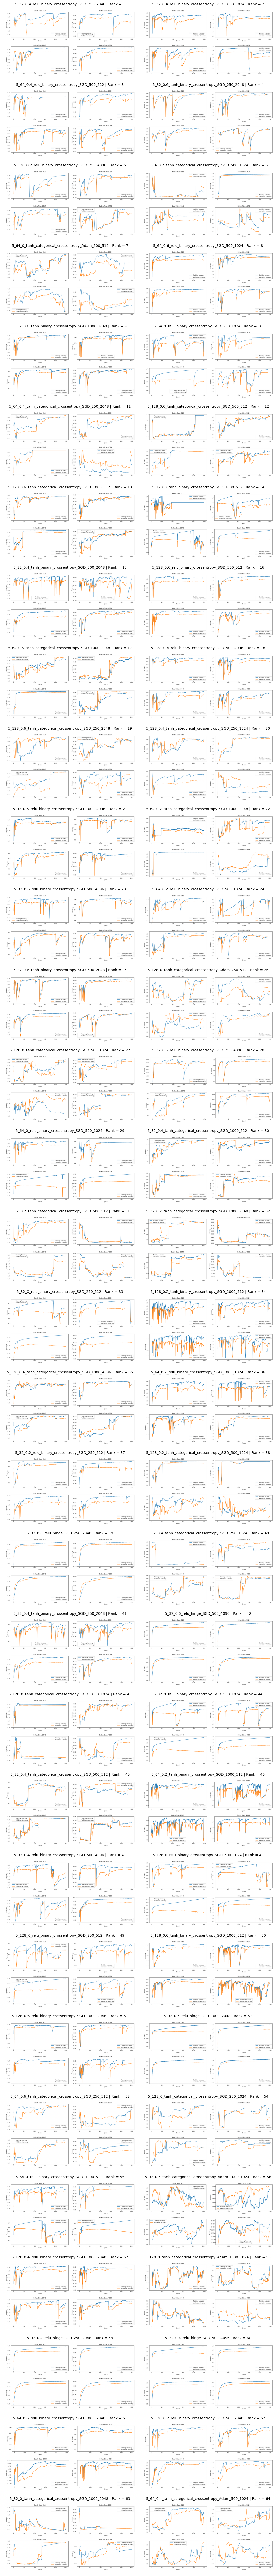

In [18]:
import math
# Define the number of rows and columns
num_rows = math.ceil(len(top_n_unique_model_parameters) / 2)
num_cols = 2

# Calculate the figure size based on the image dimensions
image_width = 1500  # Width of your images
image_height = 800  # Height of your images
fig_width = 12  # Adjust this based on your preference
fig_height = (fig_width / image_width) * image_height * num_rows / num_cols

# Create the figure and subplots
figure, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for indx, row in top_n_unique_models_df.iterrows():
    row_indx = i // num_cols
    col_indx = i % num_cols
    i += 1
    ax = axs[row_indx, col_indx]
    
    model_parameter = row['model_parameter']
    fig_path = row['batch_size_path']
    img = Image.open(fig_path)
    
    # Display the image at its original aspect ratio
    ax.imshow(img)
    parameter = re.split(r'confusion_matrix_(.*?).png', row['confusion_matrix'])[1]
    ax.set_title(f'{parameter} | Rank = {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{results_path}bilstm_script_2_top_n_model_train_val_accuracies.png')
plt.show()

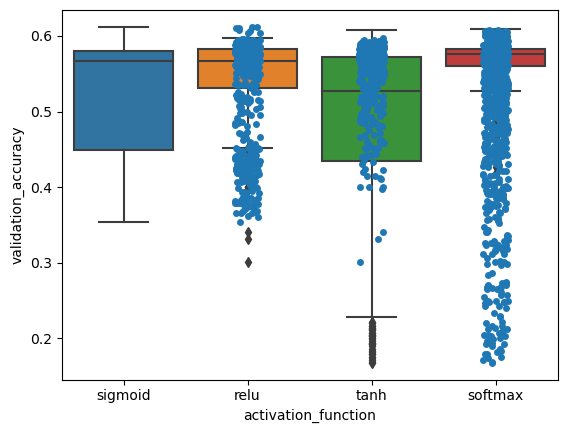

In [19]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='validation_accuracy', data=df)
sns.stripplot(x='activation_function', y='validation_accuracy', data=df)
plt.show()

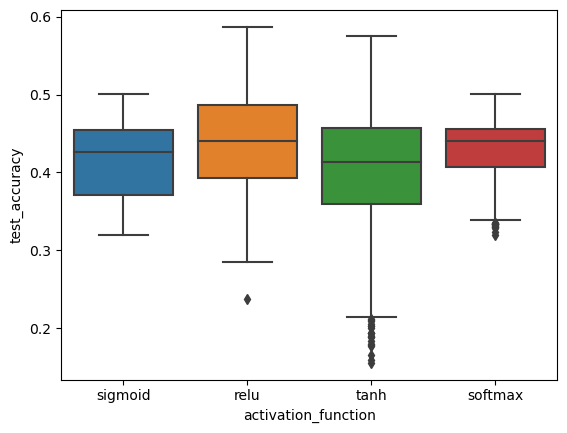

In [20]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='test_accuracy', data=df)
# sns.stripplot(x='activation_function', y='test_accuracy', data=df)
plt.show()